# Import Libraries

In [1]:
import sklearn
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import os
import datetime
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Data Preparation

Dataset diambil menggunakan API Visual Crossing. Data tersebar dalam beberapa CSV sehingga perlu digabung menjadi 1 buah dataset terlebih dahulu.

In [2]:
jonggol1 = pd.read_csv('C:/Users/Matthew/IPython/GEMASTIK15/Kecamatan/Jonggol 23 September 2012 24 Februari 2015.csv')
jonggol2 = pd.read_csv('C:/Users/Matthew/IPython/GEMASTIK15/Kecamatan/Jonggol 25 Feb 2015 27 Juli 2017.csv')
jonggol3 = pd.read_csv('C:/Users/Matthew/IPython/GEMASTIK15/Kecamatan/Jonggol 28 Juli 2017 28 Desember 2019.csv')
jonggol4 = pd.read_csv('C:/Users/Matthew/IPython/GEMASTIK15/Kecamatan/Jonggol 29 Desember 2019 23 September 2022.csv')

In [3]:
df = pd.concat([jonggol1, jonggol2, jonggol3, jonggol4], axis = 0)

In [4]:
df

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,"-6.495660182,107.0462951",2012-09-23,32.8,23.0,28.1,37.0,23.0,30.6,22.6,73.1,...,25.9,10,NaN,2012-09-23T05:40:44,2012-09-23T17:47:39,0.28,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"96741099999,WIII,96739099999,WIHH,96749099999,..."
1,"-6.495660182,107.0462951",2012-09-24,32.2,23.4,27.9,37.9,23.4,30.5,22.8,74.5,...,23.7,9,NaN,2012-09-24T05:40:13,2012-09-24T17:47:29,0.34,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"96741099999,WIII,96739099999,WIHH,96749099999,..."
2,"-6.495660182,107.0462951",2012-09-25,32.8,22.6,27.7,38.0,22.6,30.1,21.9,71.0,...,21.7,9,NaN,2012-09-25T05:39:41,2012-09-25T17:47:19,0.39,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"96741099999,WIII,96739099999,WIHH,96749099999,..."
3,"-6.495660182,107.0462951",2012-09-26,32.0,22.5,27.4,37.9,22.5,29.6,22.0,72.6,...,19.9,9,NaN,2012-09-26T05:39:10,2012-09-26T17:47:09,0.43,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"96741099999,WIII,96739099999,WIHH,96749099999,..."
4,"-6.495660182,107.0462951",2012-09-27,33.3,22.3,27.3,36.8,22.3,29.0,21.5,71.7,...,21.8,9,NaN,2012-09-27T05:38:39,2012-09-27T17:46:59,0.46,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"96741099999,WIII,96739099999,WIHH,96749099999,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,"-6.49566018240588, 107.04629514365",2022-09-19,33.0,22.4,27.0,38.1,22.4,28.9,22.7,78.6,...,20.7,10,30.0,2022-09-19T05:43:08,2022-09-19T17:48:29,0.83,"Rain, Partially cloudy",Partly cloudy throughout the day with late aft...,rain,"96741099999,WIII,96739099999,WIHH,96781099999,..."
996,"-6.49566018240588, 107.04629514365",2022-09-20,32.5,21.7,27.9,36.8,21.7,30.4,22.4,73.2,...,22.1,10,30.0,2022-09-20T05:42:36,2022-09-20T17:48:18,0.87,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"96741099999,WIII,96739099999,WIHH,96781099999,..."
997,"-6.49566018240588, 107.04629514365",2022-09-21,31.7,24.0,27.9,36.6,24.0,30.6,23.4,77.8,...,20.9,9,30.0,2022-09-21T05:42:04,2022-09-21T17:48:08,0.91,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"WIII,WIHH,remote"
998,"-6.49566018240588, 107.04629514365",2022-09-22,31.2,25.0,27.5,37.7,25.0,30.0,24.2,83.0,...,20.2,8,30.0,2022-09-22T05:41:32,2022-09-22T17:47:57,0.95,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"WIII,WIHH"


Penelitian bertujuan untuk meramalkan temperatur kedepannya, sehingga variabel yang diambil hanya variabel datetime dan temp.

In [5]:
df = df[['datetime', 'temp']]

In [6]:
df.head()

,datetime,temp
0,2012-09-23,28.1
1,2012-09-24,27.9
2,2012-09-25,27.7
3,2012-09-26,27.4
4,2012-09-27,27.3


Variabel datetime akan diubah menjadi bertipe datetime (sebelumnya string) dan dibuat menjadi indeks dari dataset.

In [7]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [8]:
df

,datetime,temp
0,2012-09-23,28.1
1,2012-09-24,27.9
2,2012-09-25,27.7
3,2012-09-26,27.4
4,2012-09-27,27.3
...,...,...
995,2022-09-19,27.0
996,2022-09-20,27.9
997,2022-09-21,27.9
998,2022-09-22,27.5


In [9]:
df.set_index(['datetime'],inplace=True)

In [10]:
df.head()

,temp
datetime,
2012-09-23,28.1
2012-09-24,27.9
2012-09-25,27.7
2012-09-26,27.4
2012-09-27,27.3


Berikut adalah plot temperatur Kecamatan Jonggol, Kabupaten Bogor selama 10 tahun terakhir.

<AxesSubplot:xlabel='datetime', ylabel='temp'>

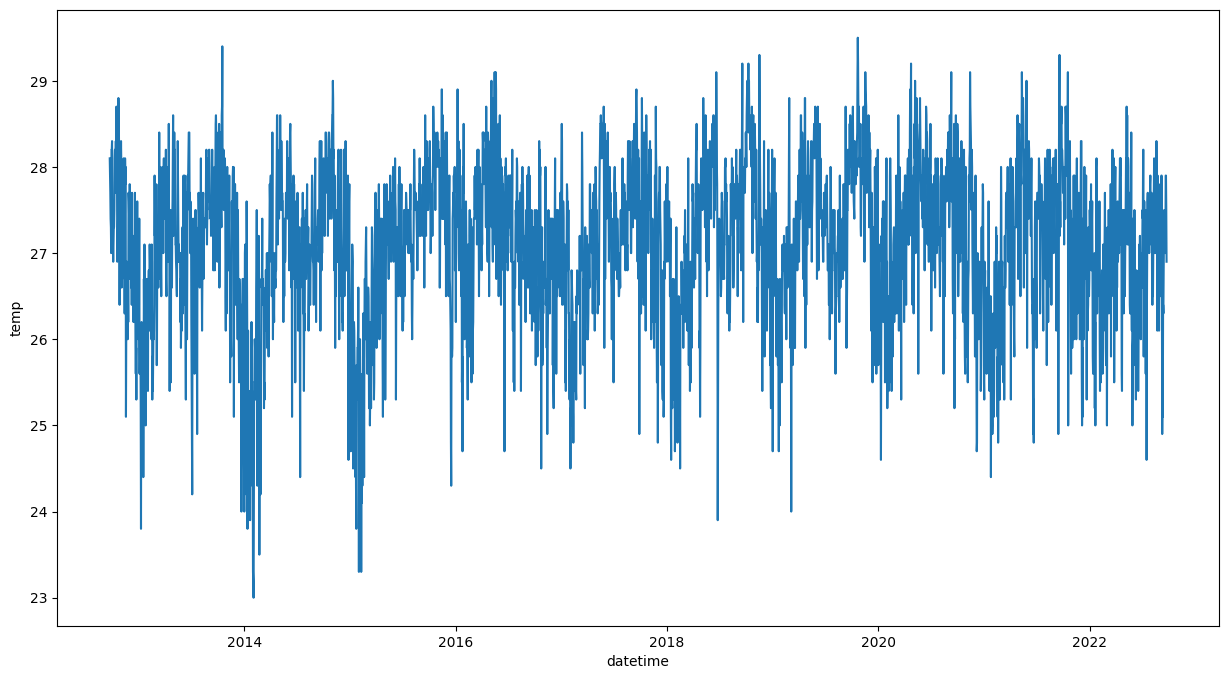

In [11]:
plt.figure(figsize=(15,8))
sns.lineplot(data = df,x = 'datetime',y = 'temp')

# Data Preprocessing

Dataset dipisahkan menjadi data latih dan data uji, dengan proporsi 80% data latih dan 20% data uji. Data latih kemudian dipisahkan kembali menjadi data latih dan data validasi, sehingga proporsi keseluruhan data latih, data validasi dan data uji adlaah 40% : 40% : 20%.

In [12]:
X_train = df[:1461]
X_val = df[1461:2922]
y = df[2922:]

## Normalization

Normalisasi dilakukan terhadap data latih, kemudian parameter yang ada pada data latih digunakan untuk normalisasi data validasi dan data uji. Hal ini dilakukan untuk menghindari data leakage yang terjadi secara tidak langsung.

Sumber : https://machinelearningmastery.com/data-preparation-without-data-leakage/

In [13]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms.fit(X_train)
X_train = mms.transform(X_train)
X_val = mms.transform(X_val)
y = mms.transform(y)

In [14]:
df[:1461] = X_train
df[1461:2922] = X_val
df[2922:] = y

In [15]:
df

,temp
datetime,
2012-09-23,0.796875
2012-09-24,0.765625
2012-09-25,0.734375
2012-09-26,0.687500
2012-09-27,0.671875
...,...
2022-09-19,0.625000
2022-09-20,0.765625
2022-09-21,0.765625


Berikut adalah plot data temperatur setelah dilakukan normalisasi.

<AxesSubplot:xlabel='datetime', ylabel='temp'>

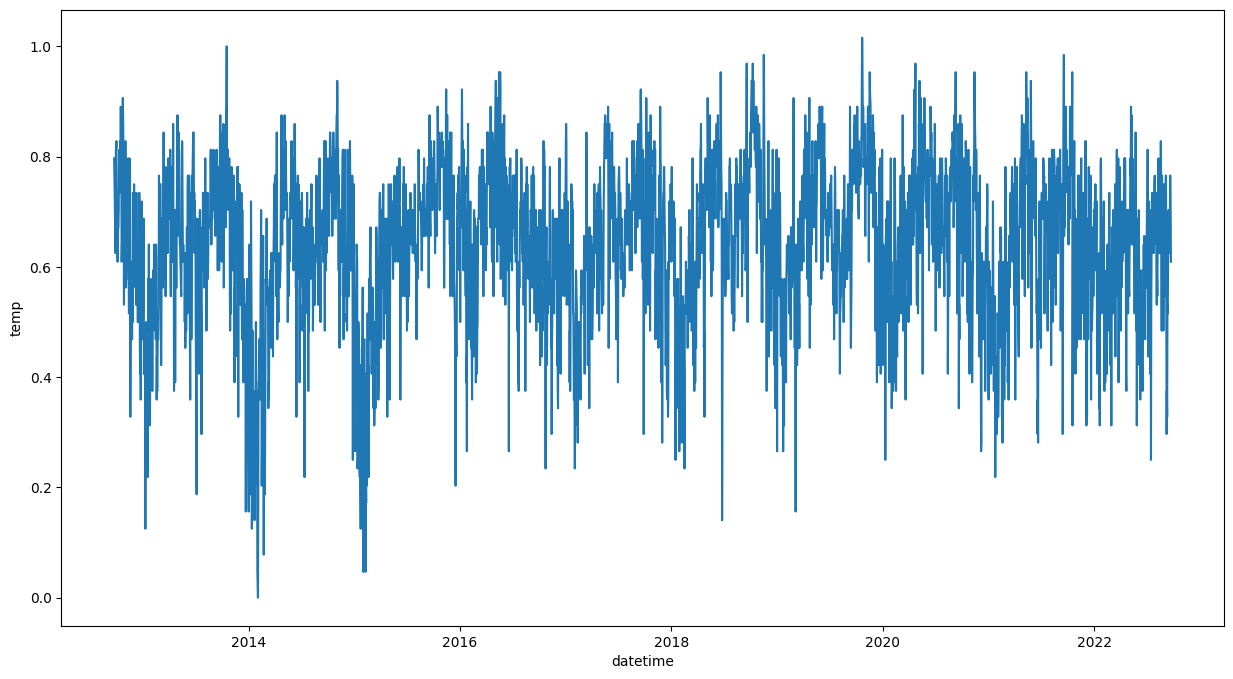

In [16]:
plt.figure(figsize=(15,8))
sns.lineplot(data = df,x = 'datetime',y = 'temp')

## Windowing

Dataset dilakukan windowing dengan proses berikut.

In [25]:
window_global = 14

In [26]:
def df_to_X_y(df,window_size=window_global):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = [a for a in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size]
        y.append(label)
    return np.array(X), np.array(y)

In [27]:
X,y = df_to_X_y(df)
X.shape, y.shape

((3639, 14, 1), (3639, 1))

In [28]:

# train 40% val 40% test 20%
X_train, y_train = X[:(int(df.shape[0]*0.4))], y[:(int(df.shape[0]*0.4))]
X_val, y_val     = X[(int(df.shape[0]*0.4)):(int(df.shape[0]*0.8))], y[(int(df.shape[0]*0.4)):(int(df.shape[0]*0.8))]
X_test,y_test    = X[(int(df.shape[0]*0.8)):], y[(int(df.shape[0]*0.8)):]

# Modelling

Model LSTM dibuat dengan 1 layer yang memiliki 10 unit. Loss function yang digunakan adalah MSE dan metrik yang digunakan adalah RMSE dengan epoch sebanyak 100 kali.

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LSTM,Dense,Dropout,Input
from tensorflow.keras import Sequential

model = Sequential()
model.add(InputLayer((wndow_global, 1)))
model.add(LSTM(10))
model.add(Dense(1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 10)                480       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


In [30]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [31]:
model.compile(loss = MeanSquaredError(), optimizer=Adam(learning_rate = 0.0001), metrics=[RootMeanSquaredError()])

In [32]:
history = model.fit(X_train, y_train,validation_data=(X_val,y_val), epochs=100, shuffle = False)

Epoch 1/100
46/46 [==============================] - 5s 35ms/step - loss: 0.4286 - root_mean_squared_error: 0.6547 - val_loss: 0.4316 - val_root_mean_squared_error: 0.6570
Epoch 2/100
46/46 [==============================] - 1s 15ms/step - loss: 0.3700 - root_mean_squared_error: 0.6083 - val_loss: 0.3727 - val_root_mean_squared_error: 0.6105
Epoch 3/100
46/46 [==============================] - 1s 15ms/step - loss: 0.3175 - root_mean_squared_error: 0.5635 - val_loss: 0.3193 - val_root_mean_squared_error: 0.5651
Epoch 4/100
46/46 [==============================] - 1s 16ms/step - loss: 0.2698 - root_mean_squared_error: 0.5195 - val_loss: 0.2704 - val_root_mean_squared_error: 0.5200
Epoch 5/100
46/46 [==============================] - 1s 16ms/step - loss: 0.2261 - root_mean_squared_error: 0.4755 - val_loss: 0.2254 - val_root_mean_squared_error: 0.4748
Epoch 6/100
46/46 [==============================] - 1s 15ms/step - loss: 0.1860 - root_mean_squared_error: 0.4313 - val_loss: 0.1841 - val_

46/46 [==============================] - 1s 15ms/step - loss: 0.0123 - root_mean_squared_error: 0.1111 - val_loss: 0.0118 - val_root_mean_squared_error: 0.1088
Epoch 96/100
46/46 [==============================] - 1s 16ms/step - loss: 0.0123 - root_mean_squared_error: 0.1110 - val_loss: 0.0118 - val_root_mean_squared_error: 0.1087
Epoch 97/100
46/46 [==============================] - 1s 15ms/step - loss: 0.0123 - root_mean_squared_error: 0.1109 - val_loss: 0.0118 - val_root_mean_squared_error: 0.1086
Epoch 98/100
46/46 [==============================] - 1s 15ms/step - loss: 0.0123 - root_mean_squared_error: 0.1109 - val_loss: 0.0118 - val_root_mean_squared_error: 0.1086
Epoch 99/100
46/46 [==============================] - 1s 16ms/step - loss: 0.0123 - root_mean_squared_error: 0.1108 - val_loss: 0.0118 - val_root_mean_squared_error: 0.1085
Epoch 100/100
46/46 [==============================] - 1s 15ms/step - loss: 0.0123 - root_mean_squared_error: 0.1108 - val_loss: 0.0118 - val_root_m

Berikut merupakan plot dari RMSE data latih dan RMSE data validasi.

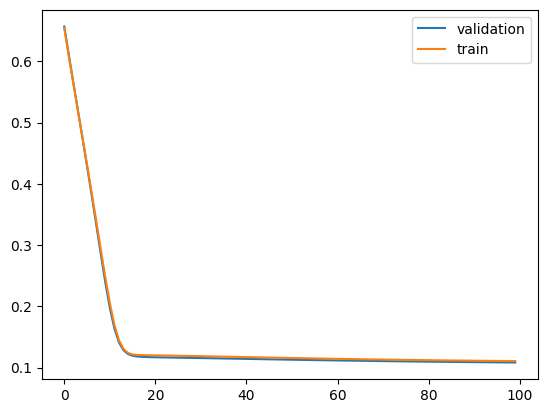

In [33]:
plt.plot(history.history['val_root_mean_squared_error'],label='validation')
plt.plot(history.history['root_mean_squared_error'],label='train')
plt.legend()
plt.show()

Model digunakan untuk memprediksi data uji.

In [34]:
y_pred = model.predict(X_test)

23/23 [==============================] - 1s 4ms/step


In [35]:
y_pred

array([[0.68427044],
       [0.69674957],
       [0.693611  ],
       [0.67960507],
       [0.6706358 ],
       [0.6729136 ],
       [0.68567663],
       [0.6893    ],
       [0.70155245],
       [0.7064006 ],
       [0.6921404 ],
       [0.68913174],
       [0.69121283],
       [0.66751236],
       [0.6655695 ],
       [0.6418887 ],
       [0.65507054],
       [0.6738588 ],
       [0.6674449 ],
       [0.6466669 ],
       [0.62019616],
       [0.59507066],
       [0.6080604 ],
       [0.6268895 ],
       [0.6290137 ],
       [0.61072546],
       [0.5904146 ],
       [0.58346087],
       [0.58862543],
       [0.5942527 ],
       [0.5650567 ],
       [0.55670726],
       [0.56210667],
       [0.5689404 ],
       [0.5986261 ],
       [0.6148707 ],
       [0.63607514],
       [0.6529518 ],
       [0.68700284],
       [0.70797545],
       [0.72540325],
       [0.7369486 ],
       [0.73841196],
       [0.7334067 ],
       [0.7478682 ],
       [0.7511757 ],
       [0.7353341 ],
       [0.717

Hasil prediksi kemudian diubah menjadi hasil prediksi suhu sebenarnya.

In [36]:
y_pred = mms.inverse_transform(y_pred)

In [37]:
y_pred

array([[27.37933 ],
       [27.459198],
       [27.439112],
       [27.349472],
       [27.292068],
       [27.306646],
       [27.38833 ],
       [27.41152 ],
       [27.489935],
       [27.520962],
       [27.429699],
       [27.410442],
       [27.423761],
       [27.27208 ],
       [27.259644],
       [27.108088],
       [27.19245 ],
       [27.312695],
       [27.271646],
       [27.138668],
       [26.969257],
       [26.808453],
       [26.891586],
       [27.012094],
       [27.025686],
       [26.908642],
       [26.778652],
       [26.73415 ],
       [26.767202],
       [26.803217],
       [26.616364],
       [26.562927],
       [26.597483],
       [26.641216],
       [26.831207],
       [26.935171],
       [27.07088 ],
       [27.17889 ],
       [27.396816],
       [27.531042],
       [27.642582],
       [27.71647 ],
       [27.725836],
       [27.693802],
       [27.786356],
       [27.807526],
       [27.706137],
       [27.590649],
       [27.429821],
       [27.369751],


In [38]:
Y_inversed = mms.inverse_transform(y_test)

Berikut adalah skor R2 dan MSE dari hasil peramalan.

In [39]:
from sklearn.metrics import r2_score, mean_squared_error

print(r2_score(Y_inversed, y_pred))
print(mean_squared_error(Y_inversed, y_pred))

0.27534932877720786
0.5616923197458511


<AxesSubplot:>

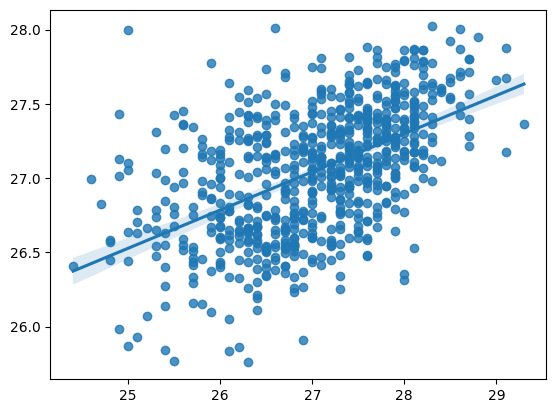

In [40]:
sns.regplot(Y_inversed, y_pred)

In [41]:
df['temp'] = mms.inverse_transform(df)

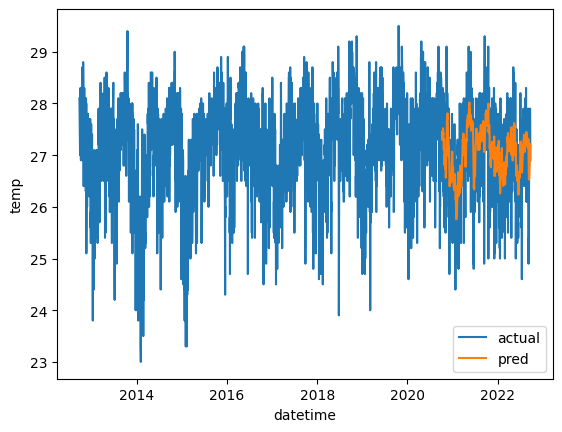

In [42]:
sns.lineplot(data = df, x = 'datetime',y = 'temp', label = 'actual')
plt.plot(df.index[(int(df.shape[0]*0.8))+window_global:], y_pred.flatten().tolist(), label = 'pred')
plt.legend()
plt.show()

In [43]:
def df_to_X(df,window_size=window_global):
    df_as_np = df.to_numpy()
    X = []
    for i in range(len(df_as_np)-window_size):
        row = [a for a in df_as_np[i:i+window_size]]
        X.append(row)
        #label = df_as_np[i+window_size]
        #y.append(label)
    return np.array(X)

In [44]:
Xnew = mms.transform(df)

In [45]:
Xnew = df_to_X(pd.Series(Xnew.flatten()))
Xnew

array([[0.796875, 0.765625, 0.734375, ..., 0.640625, 0.609375, 0.640625],
       [0.765625, 0.734375, 0.6875  , ..., 0.609375, 0.640625, 0.671875],
       [0.734375, 0.6875  , 0.671875, ..., 0.640625, 0.671875, 0.671875],
       ...,
       [0.5     , 0.296875, 0.375   , ..., 0.65625 , 0.625   , 0.765625],
       [0.296875, 0.375   , 0.328125, ..., 0.625   , 0.765625, 0.765625],
       [0.375   , 0.328125, 0.53125 , ..., 0.765625, 0.765625, 0.703125]])

In [46]:
Xnewnew = Xnew[-1].reshape((1,window_global,1))
Xnewnew

array([[[0.375   ],
        [0.328125],
        [0.53125 ],
        [0.515625],
        [0.59375 ],
        [0.640625],
        [0.703125],
        [0.640625],
        [0.703125],
        [0.65625 ],
        [0.625   ],
        [0.765625],
        [0.765625],
        [0.703125]]])

In [47]:
hasil = model.predict(Xnewnew)
hasil.shape

1/1 [==============================] - 0s 32ms/step


(1, 1)

In [48]:
hasil

array([[0.6584357]], dtype=float32)

In [50]:
def peramalan(x,modelan,window,forecasting=1):
    xx = x.flatten().tolist()
    for i in range(forecasting):
        print(window + i)
        x_feat = np.reshape(xx[i :window+i],(1,window,1))
        print(x_feat.flatten().tolist())
        xx.append(modelan.predict(x_feat).flatten().tolist()[0])
    xx = xx[window:]
    return(xx)

forecasting_result = peramalan(Xnewnew,model,window_global,365)

14
[0.375, 0.32812500000000044, 0.5312500000000004, 0.5156250000000004, 0.5937500000000004, 0.6406250000000004, 0.7031250000000004, 0.6406250000000004, 0.7031250000000004, 0.6562500000000004, 0.6250000000000004, 0.7656250000000004, 0.7656250000000004, 0.7031250000000004]
1/1 [==============================] - 0s 39ms/step
15
[0.32812500000000044, 0.5312500000000004, 0.5156250000000004, 0.5937500000000004, 0.6406250000000004, 0.7031250000000004, 0.6406250000000004, 0.7031250000000004, 0.6562500000000004, 0.6250000000000004, 0.7656250000000004, 0.7656250000000004, 0.7031250000000004, 0.6584357023239136]
1/1 [==============================] - 0s 40ms/step
16
[0.5312500000000004, 0.5156250000000004, 0.5937500000000004, 0.6406250000000004, 0.7031250000000004, 0.6406250000000004, 0.7031250000000004, 0.6562500000000004, 0.6250000000000004, 0.7656250000000004, 0.7656250000000004, 0.7031250000000004, 0.6584357023239136, 0.6625259518623352]
1/1 [==============================] - 0s 30ms/step
17


1/1 [==============================] - 0s 36ms/step
39
[0.6714242100715637, 0.6693575382232666, 0.6672942638397217, 0.666286289691925, 0.6660431027412415, 0.6657492518424988, 0.6653519868850708, 0.6649134159088135, 0.6644405722618103, 0.6639596819877625, 0.663486897945404, 0.6630397439002991, 0.6626028418540955, 0.6621910929679871]
1/1 [==============================] - 0s 32ms/step
40
[0.6693575382232666, 0.6672942638397217, 0.666286289691925, 0.6660431027412415, 0.6657492518424988, 0.6653519868850708, 0.6649134159088135, 0.6644405722618103, 0.6639596819877625, 0.663486897945404, 0.6630397439002991, 0.6626028418540955, 0.6621910929679871, 0.6617926359176636]
1/1 [==============================] - 0s 32ms/step
41
[0.6672942638397217, 0.666286289691925, 0.6660431027412415, 0.6657492518424988, 0.6653519868850708, 0.6649134159088135, 0.6644405722618103, 0.6639596819877625, 0.663486897945404, 0.6630397439002991, 0.6626028418540955, 0.6621910929679871, 0.6617926359176636, 0.6613991260528564

1/1 [==============================] - 0s 33ms/step
64
[0.6586790680885315, 0.6584722399711609, 0.6582761406898499, 0.6580897569656372, 0.6579129099845886, 0.657745361328125, 0.6575861573219299, 0.6574347019195557, 0.6572902798652649, 0.6571528315544128, 0.6570221185684204, 0.6568979024887085, 0.6567795276641846, 0.6566672921180725]
1/1 [==============================] - 0s 48ms/step
65
[0.6584722399711609, 0.6582761406898499, 0.6580897569656372, 0.6579129099845886, 0.657745361328125, 0.6575861573219299, 0.6574347019195557, 0.6572902798652649, 0.6571528315544128, 0.6570221185684204, 0.6568979024887085, 0.6567795276641846, 0.6566672921180725, 0.6565603613853455]
1/1 [==============================] - 0s 32ms/step
66
[0.6582761406898499, 0.6580897569656372, 0.6579129099845886, 0.657745361328125, 0.6575861573219299, 0.6574347019195557, 0.6572902798652649, 0.6571528315544128, 0.6570221185684204, 0.6568979024887085, 0.6567795276641846, 0.6566672921180725, 0.6565603613853455, 0.6564587950706

1/1 [==============================] - 0s 33ms/step
89
[0.6556799411773682, 0.6556214690208435, 0.6555659174919128, 0.6555129289627075, 0.6554626226425171, 0.6554147005081177, 0.6553691625595093, 0.6553258299827576, 0.6552846431732178, 0.6552454829216003, 0.655208170413971, 0.6551727056503296, 0.6551390290260315, 0.6551069617271423]
1/1 [==============================] - 0s 33ms/step
90
[0.6556214690208435, 0.6555659174919128, 0.6555129289627075, 0.6554626226425171, 0.6554147005081177, 0.6553691625595093, 0.6553258299827576, 0.6552846431732178, 0.6552454829216003, 0.655208170413971, 0.6551727056503296, 0.6551390290260315, 0.6551069617271423, 0.6550765633583069]
1/1 [==============================] - 0s 34ms/step
91
[0.6555659174919128, 0.6555129289627075, 0.6554626226425171, 0.6554147005081177, 0.6553691625595093, 0.6553258299827576, 0.6552846431732178, 0.6552454829216003, 0.655208170413971, 0.6551727056503296, 0.6551390290260315, 0.6551069617271423, 0.6550765633583069, 0.6550474166870

1/1 [==============================] - 0s 32ms/step
114
[0.6548248529434204, 0.6548081040382385, 0.6547921299934387, 0.6547769904136658, 0.6547626256942749, 0.6547488570213318, 0.6547358632087708, 0.6547233462333679, 0.6547116637229919, 0.6547004580497742, 0.6546897888183594, 0.6546796560287476, 0.654670000076294, 0.6546607613563538]
1/1 [==============================] - 0s 32ms/step
115
[0.6548081040382385, 0.6547921299934387, 0.6547769904136658, 0.6547626256942749, 0.6547488570213318, 0.6547358632087708, 0.6547233462333679, 0.6547116637229919, 0.6547004580497742, 0.6546897888183594, 0.6546796560287476, 0.654670000076294, 0.6546607613563538, 0.6546520590782166]
1/1 [==============================] - 0s 41ms/step
116
[0.6547921299934387, 0.6547769904136658, 0.6547626256942749, 0.6547488570213318, 0.6547358632087708, 0.6547233462333679, 0.6547116637229919, 0.6547004580497742, 0.6546897888183594, 0.6546796560287476, 0.654670000076294, 0.6546607613563538, 0.6546520590782166, 0.6546437740

1/1 [==============================] - 0s 38ms/step
139
[0.6545799374580383, 0.6545751690864563, 0.6545705795288086, 0.65456622838974, 0.6545621156692505, 0.6545581817626953, 0.6545544862747192, 0.6545509099960327, 0.6545476317405701, 0.6545442938804626, 0.6545411944389343, 0.6545383334159851, 0.6545356512069702, 0.6545329689979553]
1/1 [==============================] - 0s 42ms/step
140
[0.6545751690864563, 0.6545705795288086, 0.65456622838974, 0.6545621156692505, 0.6545581817626953, 0.6545544862747192, 0.6545509099960327, 0.6545476317405701, 0.6545442938804626, 0.6545411944389343, 0.6545383334159851, 0.6545356512069702, 0.6545329689979553, 0.6545304656028748]
1/1 [==============================] - 0s 35ms/step
141
[0.6545705795288086, 0.65456622838974, 0.6545621156692505, 0.6545581817626953, 0.6545544862747192, 0.6545509099960327, 0.6545476317405701, 0.6545442938804626, 0.6545411944389343, 0.6545383334159851, 0.6545356512069702, 0.6545329689979553, 0.6545304656028748, 0.6545280218124

1/1 [==============================] - 0s 34ms/step
164
[0.6545098423957825, 0.6545084118843079, 0.6545071601867676, 0.6545059084892273, 0.6545047163963318, 0.654503583908081, 0.6545024514198303, 0.6545014977455139, 0.6545004844665527, 0.6544995903968811, 0.6544986963272095, 0.6544978022575378, 0.6544970870018005, 0.6544963121414185]
1/1 [==============================] - 0s 35ms/step
165
[0.6545084118843079, 0.6545071601867676, 0.6545059084892273, 0.6545047163963318, 0.654503583908081, 0.6545024514198303, 0.6545014977455139, 0.6545004844665527, 0.6544995903968811, 0.6544986963272095, 0.6544978022575378, 0.6544970870018005, 0.6544963121414185, 0.6544956564903259]
1/1 [==============================] - 0s 41ms/step
166
[0.6545071601867676, 0.6545059084892273, 0.6545047163963318, 0.654503583908081, 0.6545024514198303, 0.6545014977455139, 0.6545004844665527, 0.6544995903968811, 0.6544986963272095, 0.6544978022575378, 0.6544970870018005, 0.6544963121414185, 0.6544956564903259, 0.6544949412

1/1 [==============================] - 0s 32ms/step
189
[0.6544896960258484, 0.654489278793335, 0.6544889211654663, 0.6544886231422424, 0.654488205909729, 0.6544878482818604, 0.6544876098632812, 0.6544873118400574, 0.6544870138168335, 0.6544867157936096, 0.6544865369796753, 0.6544862985610962, 0.6544860005378723, 0.6544858813285828]
1/1 [==============================] - 0s 42ms/step
190
[0.654489278793335, 0.6544889211654663, 0.6544886231422424, 0.654488205909729, 0.6544878482818604, 0.6544876098632812, 0.6544873118400574, 0.6544870138168335, 0.6544867157936096, 0.6544865369796753, 0.6544862985610962, 0.6544860005378723, 0.6544858813285828, 0.6544856429100037]
1/1 [==============================] - 0s 41ms/step
191
[0.6544889211654663, 0.6544886231422424, 0.654488205909729, 0.6544878482818604, 0.6544876098632812, 0.6544873118400574, 0.6544870138168335, 0.6544867157936096, 0.6544865369796753, 0.6544862985610962, 0.6544860005378723, 0.6544858813285828, 0.6544856429100037, 0.654485404491

1/1 [==============================] - 0s 33ms/step
214
[0.6544839143753052, 0.6544837951660156, 0.6544837951660156, 0.6544836163520813, 0.6544835567474365, 0.6544834971427917, 0.6544833779335022, 0.6544832587242126, 0.6544831991195679, 0.6544831395149231, 0.6544829607009888, 0.6544829607009888, 0.654482901096344, 0.6544827818870544]
1/1 [==============================] - 0s 33ms/step
215
[0.6544837951660156, 0.6544837951660156, 0.6544836163520813, 0.6544835567474365, 0.6544834971427917, 0.6544833779335022, 0.6544832587242126, 0.6544831991195679, 0.6544831395149231, 0.6544829607009888, 0.6544829607009888, 0.654482901096344, 0.6544827818870544, 0.6544827818870544]
1/1 [==============================] - 0s 32ms/step
216
[0.6544837951660156, 0.6544836163520813, 0.6544835567474365, 0.6544834971427917, 0.6544833779335022, 0.6544832587242126, 0.6544831991195679, 0.6544831395149231, 0.6544829607009888, 0.6544829607009888, 0.654482901096344, 0.6544827818870544, 0.6544827818870544, 0.6544827222

1/1 [==============================] - 0s 32ms/step
239
[0.6544824242591858, 0.6544824242591858, 0.6544824242591858, 0.6544823050498962, 0.6544823050498962, 0.6544821858406067, 0.6544821858406067, 0.6544821858406067, 0.6544821262359619, 0.6544820666313171, 0.6544820666313171, 0.6544820666313171, 0.6544820666313171, 0.6544820666313171]
1/1 [==============================] - 0s 33ms/step
240
[0.6544824242591858, 0.6544824242591858, 0.6544823050498962, 0.6544823050498962, 0.6544821858406067, 0.6544821858406067, 0.6544821858406067, 0.6544821262359619, 0.6544820666313171, 0.6544820666313171, 0.6544820666313171, 0.6544820666313171, 0.6544820666313171, 0.6544820666313171]
1/1 [==============================] - 0s 32ms/step
241
[0.6544824242591858, 0.6544823050498962, 0.6544823050498962, 0.6544821858406067, 0.6544821858406067, 0.6544821858406067, 0.6544821262359619, 0.6544820666313171, 0.6544820666313171, 0.6544820666313171, 0.6544820666313171, 0.6544820666313171, 0.6544820666313171, 0.6544820

1/1 [==============================] - 0s 39ms/step
264
[0.6544817686080933, 0.654481828212738, 0.6544817686080933, 0.6544817686080933, 0.654481828212738, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.654481828212738, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.654481828212738]
1/1 [==============================] - 0s 37ms/step
265
[0.654481828212738, 0.6544817686080933, 0.6544817686080933, 0.654481828212738, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.654481828212738, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.654481828212738, 0.6544817686080933]
1/1 [==============================] - 0s 33ms/step
266
[0.6544817686080933, 0.6544817686080933, 0.654481828212738, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.654481828212738, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.654481828212738, 0.6544817686080933, 0.6544817686080933]


1/1 [==============================] - 0s 32ms/step
289
[0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933]
1/1 [==============================] - 0s 33ms/step
290
[0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933]
1/1 [==============================] - 0s 35ms/step
291
[0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817

1/1 [==============================] - 0s 32ms/step
314
[0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933]
1/1 [==============================] - 0s 32ms/step
315
[0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933]
1/1 [==============================] - 0s 32ms/step
316
[0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817

1/1 [==============================] - 0s 32ms/step
339
[0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933]
1/1 [==============================] - 0s 32ms/step
340
[0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933]
1/1 [==============================] - 0s 40ms/step
341
[0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817

1/1 [==============================] - 0s 40ms/step
364
[0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933]
1/1 [==============================] - 0s 39ms/step
365
[0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933]
1/1 [==============================] - 0s 40ms/step
366
[0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817686080933, 0.6544817

In [51]:
forecasting_result

[0.6584357023239136,
 0.6625259518623352,
 0.668554425239563,
 0.6709207892417908,
 0.6731874346733093,
 0.6740112900733948,
 0.6739548444747925,
 0.6728609800338745,
 0.6727294325828552,
 0.6716379523277283,
 0.6712809205055237,
 0.6714242100715637,
 0.6693575382232666,
 0.6672942638397217,
 0.666286289691925,
 0.6660431027412415,
 0.6657492518424988,
 0.6653519868850708,
 0.6649134159088135,
 0.6644405722618103,
 0.6639596819877625,
 0.663486897945404,
 0.6630397439002991,
 0.6626028418540955,
 0.6621910929679871,
 0.6617926359176636,
 0.6613991260528564,
 0.6610458493232727,
 0.6607324481010437,
 0.6604406237602234,
 0.6601572036743164,
 0.6598827242851257,
 0.6596187949180603,
 0.6593663692474365,
 0.659125566482544,
 0.6588966250419617,
 0.6586790680885315,
 0.6584722399711609,
 0.6582761406898499,
 0.6580897569656372,
 0.6579129099845886,
 0.657745361328125,
 0.6575861573219299,
 0.6574347019195557,
 0.6572902798652649,
 0.6571528315544128,
 0.6570221185684204,
 0.656897902488708

In [52]:
result = mms.inverse_transform(np.reshape(forecasting_result, (-1, 1)))

In [53]:
result

array([[27.21398849],
       [27.24016609],
       [27.27874832],
       [27.29389305],
       [27.30839958],
       [27.31367226],
       [27.313311  ],
       [27.30631027],
       [27.30546837],
       [27.29848289],
       [27.29619789],
       [27.29711494],
       [27.28388824],
       [27.27068329],
       [27.26423225],
       [27.26267586],
       [27.26079521],
       [27.25825272],
       [27.25544586],
       [27.25241966],
       [27.24934196],
       [27.24631615],
       [27.24345436],
       [27.24065819],
       [27.23802299],
       [27.23547287],
       [27.23295441],
       [27.23069344],
       [27.22868767],
       [27.22681999],
       [27.2250061 ],
       [27.22324944],
       [27.22156029],
       [27.21994476],
       [27.21840363],
       [27.2169384 ],
       [27.21554604],
       [27.21422234],
       [27.2129673 ],
       [27.21177444],
       [27.21064262],
       [27.20957031],
       [27.20855141],
       [27.20758209],
       [27.20665779],
       [27

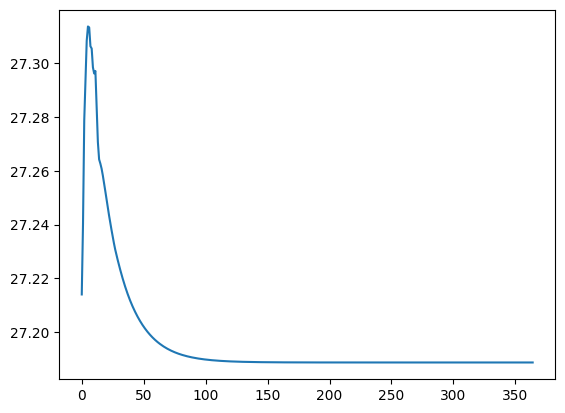

In [54]:
plt.plot(result)

ValueError: x and y must have same first dimension, but have shapes (0,) and (365, 1)

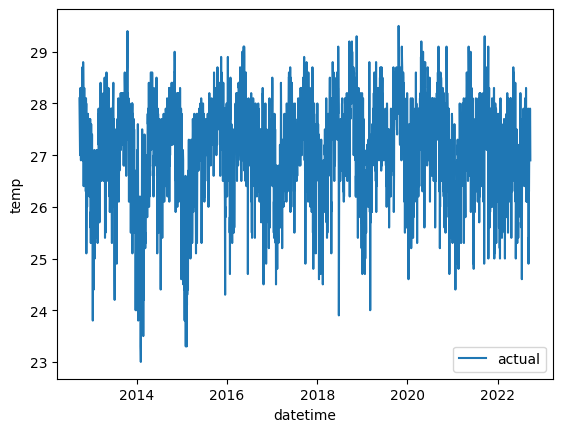

In [55]:
sns.lineplot(data = df, x = 'datetime',y = 'temp', label = 'actual')
plt.plot(df.index[df.shape[0]:], result, label = 'pred')
plt.legend()
plt.show()